Time cost is 4.39700007439 seconds


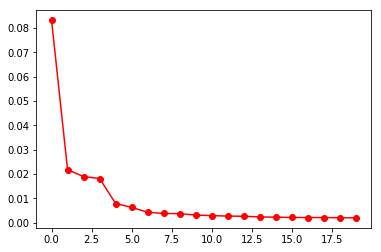

In [2]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import time
import pylab as pl

"""
The "Russell.txt" is different from the one professor has uploaded:
first row and last row have been deleted.
"""
df = pd.read_table("Russell.txt",sep=" ",header=None)
df = df.drop(947, 1) # drop a NAN column
cov=np.array(df)

"""
Find the max eigenvalue and eigenvector of the matrix
The default assumption is the matrix is semidefinite so that there is no negative eigenvector.
If the assumption fails, please use findMaxEigen(matrix,eps,True) 
"""
def findMaxEigen(cov,eps=0.01,negative_eigen=False):
    if negative_eigen==False:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=norm(tempv)/norm(vector)
        return eigenvalue,vector
    else:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        mark=+1
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            if norm(tempv+vector)<eps:
                vector=tempv
                mark=-1
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=mark*norm(tempv)/norm(vector)
        return eigenvalue,vector

mcov=cov
evalue=[]
evector=[]
count=0

standard=findMaxEigen(mcov)[0]
eps0=0.01
eps=eps0
start = time.time()
while True:
    value,vector=findMaxEigen(mcov)
    if value< eps*standard:
        break
    count+=1
    evalue.append(value)
    evector.append(vector)
    mcov=mcov-value*np.matmul(vector,vector.transpose())
end= time.time()
print "Time cost is",end- start,"seconds"

YY=evalue[:20]
pl.plot(range(len(YY)),YY,"ro-")
pl.show()